# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-19 22:15:00--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv’

banana_quality.csv  100%[===================>] 615.24K  --.-KB/s    in 0.06s   

2025-03-19 22:15:00 (10.5 MB/s) - ‘banana_quality.csv’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [4]:
print('\nResumen estadístico:')
display(df.describe())

print('\nInformación general:')
display(df.info())

print('\nValores nulos:')
display(df.isnull().sum())


Resumen estadístico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


None


Valores nulos:


,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.


Conteo de instancias por categoría de Quality:


,count
Quality,
Good,4006
Bad,3994


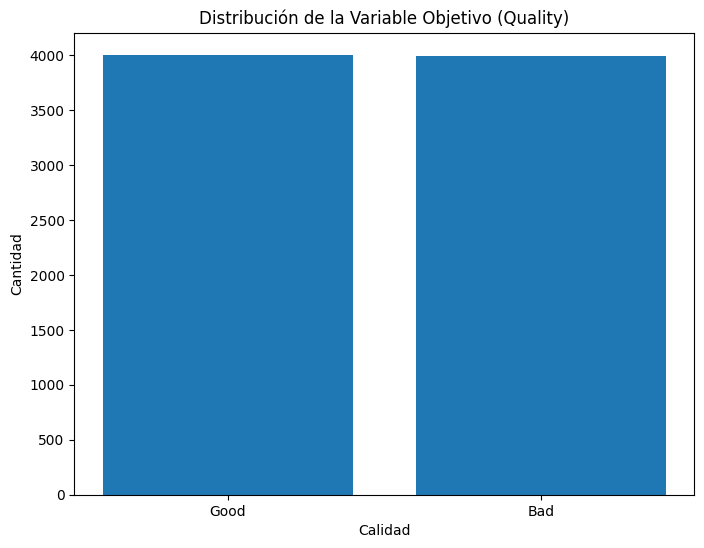

In [5]:
quality_counts = df['Quality'].value_counts()

print('\nConteo de instancias por categoría de Quality:')
display(quality_counts)

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Variable Objetivo (Quality)')
plt.show()

## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [6]:
df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

print('\nPrimeras filas del dataset con Quality numérico:')
display(df.head())


Primeras filas del dataset con Quality numérico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [7]:
X = df.drop('Quality', axis=1)
y = df['Quality']

print('\nVariables independientes (X):')
display(X.head())

print('\nVariable dependiente (y):')
display(y.head())


Variables independientes (X):


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442



Variable dependiente (y):


,Quality
0,1
1,1
2,1
3,1
4,1


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('\nTamaño del conjunto de entrenamiento:', X_train.shape)
print('Tamaño del conjunto de prueba:', X_test.shape)


Tamaño del conjunto de entrenamiento: (5600, 7)
Tamaño del conjunto de prueba: (2400, 7)


## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.


Conteo de instancias por categoría de Quality en el conjunto de entrenamiento:


,count
Quality,
1,2804
0,2796



Conteo de instancias por categoría de Quality en el conjunto de prueba:


,count
Quality,
1,1202
0,1198


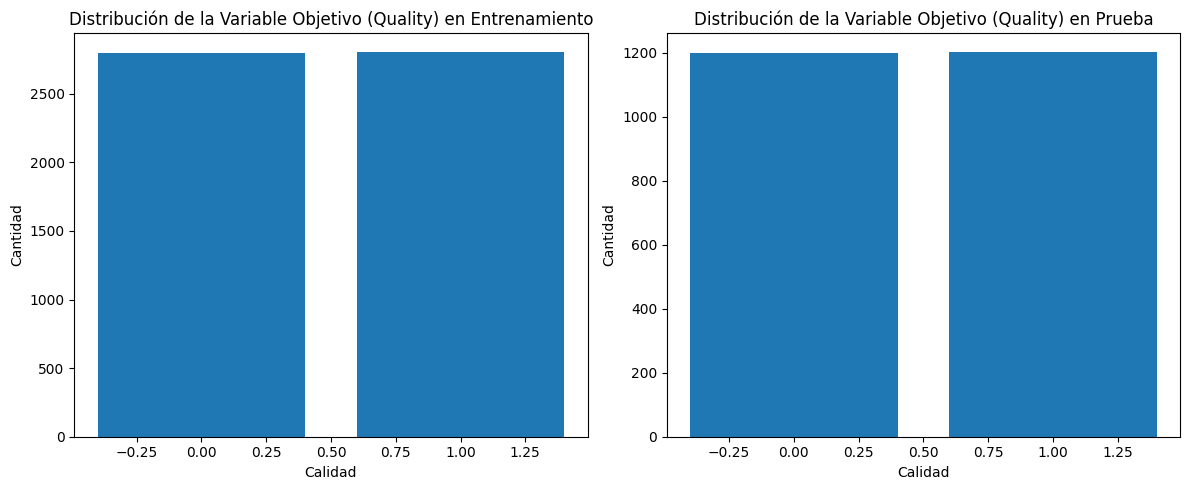

In [9]:
train_quality_counts = y_train.value_counts()
test_quality_counts = y_test.value_counts()

print('\nConteo de instancias por categoría de Quality en el conjunto de entrenamiento:')
display(train_quality_counts)

print('\nConteo de instancias por categoría de Quality en el conjunto de prueba:')
display(test_quality_counts)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(train_quality_counts.index, train_quality_counts.values)
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Variable Objetivo (Quality) en Entrenamiento')

plt.subplot(1, 2, 2)
plt.bar(test_quality_counts.index, test_quality_counts.values)
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Variable Objetivo (Quality) en Prueba')

plt.tight_layout()
plt.show()

## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print('Modelo de Regresión Logística entrenado.')


Modelo de Regresión Logística entrenado.


## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [11]:
y_pred = model.predict(X_test)

print('Predicciones en el conjunto de prueba:')
y_pred

Predicciones en el conjunto de prueba:


array([1, 0, 0, ..., 0, 1, 1])

## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"\nMatriz de Confusión:\n{cm}")

report = classification_report(y_test, y_pred)
print(f"\nReporte de Clasificación:\n{report}")

Accuracy: 0.8725

Matriz de Confusión:
[[1024  174]
 [ 132 1070]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1198
           1       0.86      0.89      0.87      1202

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

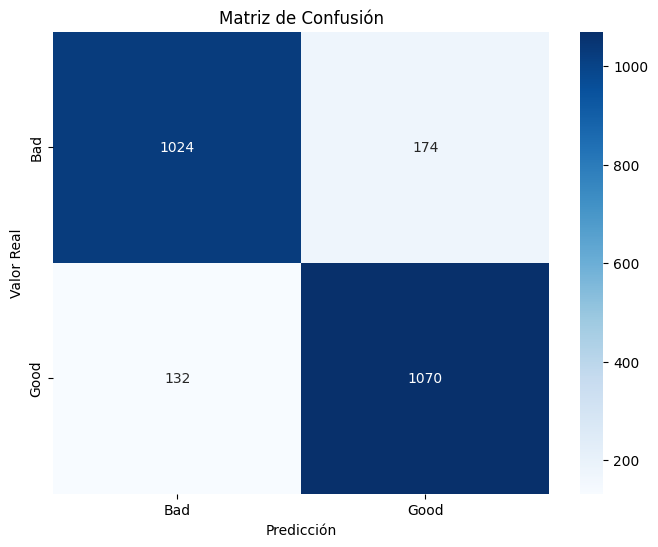

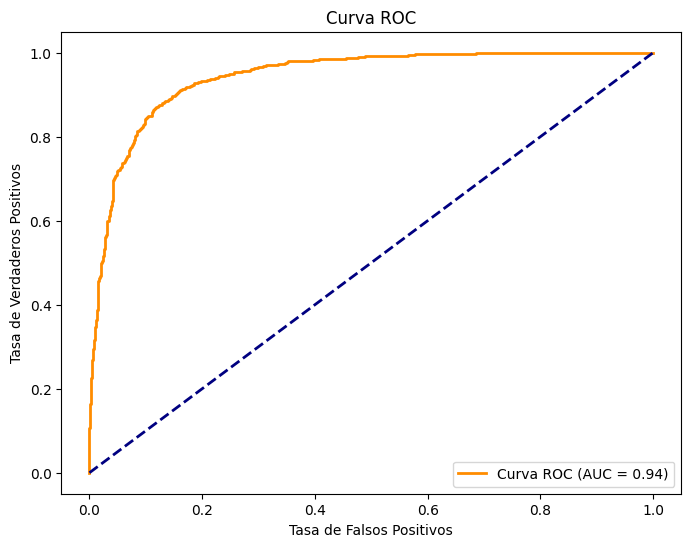

In [13]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [14]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(metrics):
  """
  Envía un correo electrónico con las métricas del modelo.

  Args:
    metrics: Un diccionario con las métricas del modelo.
  """

  sender_email = "your_email@gmail.com"
  sender_password = "your_password"
  receiver_email = "recipient_email@example.com"

  msg = MIMEMultipart()
  msg['From'] = sender_email
  msg['To'] = receiver_email
  msg['Subject'] = "Métricas del Modelo de Calidad de Bananas"

  body = "Hola,\n\n"
  body += "Estas son las métricas del modelo de calidad de bananas:\n\n"
  for metric_name, metric_value in metrics.items():
    body += f"{metric_name}: {metric_value}\n"
  body += "\nSaludos,\nTu Modelo"

  msg.attach(MIMEText(body, 'plain'))

  try:
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(sender_email, sender_password)
    text = msg.as_string()
    server.sendmail(sender_email, receiver_email, text)
    server.quit()
    print("Correo electrónico enviado con éxito!")
  except Exception as e:
    print(f"Error al enviar el correo electrónico: {e}")



accuracy = accuracy_score(y_test, y_pred)
precision = classification_report(y_test, y_pred).split('\n')[2].split()[1]
recall = classification_report(y_test, y_pred).split('\n')[2].split()[2]
f1_score = classification_report(y_test, y_pred).split('\n')[2].split()[3]

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


metrics = {
    "Accuracy": accuracy,
    "Precisión": precision,
    "Recall": recall,
    "F1-Score": f1_score,
    "AUC": roc_auc,
}

print("Resumen de Métricas:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value}")

Resumen de Métricas:
Accuracy: 0.8725
Precisión: 0.89
Recall: 0.85
F1-Score: 0.87
AUC: 0.9431463698510274


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.